In [19]:
##Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import numpy as np

# from module1 import *

In [20]:

class PARAMS1:
    Nclasses = 2
    List_Files = [r'/home/shubham/MAIN/Academics/CS-669/assignment_01/linearly_seperable_data/Class1.txt', r'/home/shubham/MAIN/Academics/CS-669/assignment_01/linearly_seperable_data/Class2.txt']
    List_Class = [1, 2]

class PARAMS2:
    Nclasses = 2
    List_Files = [r'/home/shubham/MAIN/Academics/CS-669/assignment_01/non_linearly_seperable data/Class1.txt', r'/home/shubham/MAIN/Academics/CS-669/assignment_01/non_linearly_seperable data/Class2.txt']
    List_Class = [1, 2]

class PARAMS3:
    Nclasses = 3
    List_Files = [r'/home/shubham/MAIN/Academics/CS-669/assignment_01/real_world_data/class1.txt', 
                  r'/home/shubham/MAIN/Academics/CS-669/assignment_01/real_world_data/class2.txt', 
                  r'/home/shubham/MAIN/Academics/CS-669/assignment_01/real_world_data/class3.txt']
    List_Class = [1, 2, 3]


In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

def readData (filename, Class):
    filename = os.path.join(os.getcwd(),  filename)
    allLines = open(filename, 'r').readlines()
    Data_X = []
    Data_Y = []
    Data_class = []
    for line in allLines:
        Data_X.append(list(map(float, line.strip().split()))[0])
        Data_Y.append(list(map(float, line.strip().split()))[1])
        Data_class.append(Class)
    
    return [Data_X, Data_Y, Data_class]

def Visualize(Data, Class):
    plt.figure(figsize=(15,6))
    plt.rcParams['axes.facecolor'] = 'Silver'
    plt.scatter(Data['X'], Data['Y'], c=Class)
    plt.xlabel("X-axis", fontsize = 20)
    plt.ylabel("Y-axis", fontsize = 20)
    plt.show()


class BayesClassifier:
    
    def fit(self, X, Y):
        self.Class, self.ClassCounts = np.unique(Y, return_counts=True)
        self.NClasses = len(self.Class)

        self.prior = {self.Class[i]: self.ClassCounts[i] for i in range(len(self.Class))}

        ClassBasedData = {}
        for Class in self.Class:
            ClassBasedData[Class] = [[],[]]
        
        for i in range(len(Y)):
            ClassBasedData[Y[i]][0].append(list(X.iloc[i])[0])
            ClassBasedData[Y[i]][1].append(list(X.iloc[i])[1])
        
        self.pdfs = {}
        for Class in self.Class:
            Data = np.array(ClassBasedData[Class])

           
            Mean = np.mean(Data, axis=1)
            Cov = np.cov(Data)

            self.pdfs[Class] = {}
            self.pdfs[Class]['Mean'] = Mean
            self.pdfs[Class]['Covariance'] = Cov
        #print(self.pdfs)
    def predict(self, X):
        '''
        for every test data, finding posterior probability for every class and choosing the biggest one
        '''
        Y = []
        for row in X.values:
            Posterior = {}
            for C in self.Class:
                Posterior[C] = self.Likelihood(row, C) * self.prior[C]
            #print(Proba)
            res = self.Class[0]
            for C in self.Class:
                if (Posterior[res] < Posterior[C]):
                    res = C
            #print(res)
            Y.append(res)
        return Y
    
    def Likelihood(self, Data, Class):
        '''
        Using multivariate gaussian probability formula
        '''
        pdf = self.pdfs[Class]
        Mean = pdf['Mean']
        Cov = pdf['Covariance']
        Data = np.array(Data)
        
        res = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(Data - Mean), np.linalg.inv(Cov)), (Data - Mean)))
        res = res / ((2*3.14) * ((np.linalg.det(Cov)) ** 0.5))        
        
        return res


def Accuracy(test, pred):
    c = 0
    for i in range(len(test)):
        if (test[i] == pred[i]):
            c += 1
    return c/len(test)



          X         Y
0   4.52188  3.493310
1  10.60170  5.012840
2  -8.59493  0.884666
3   6.04395  3.909190
4   3.49514  3.337680
Training Data Visualization


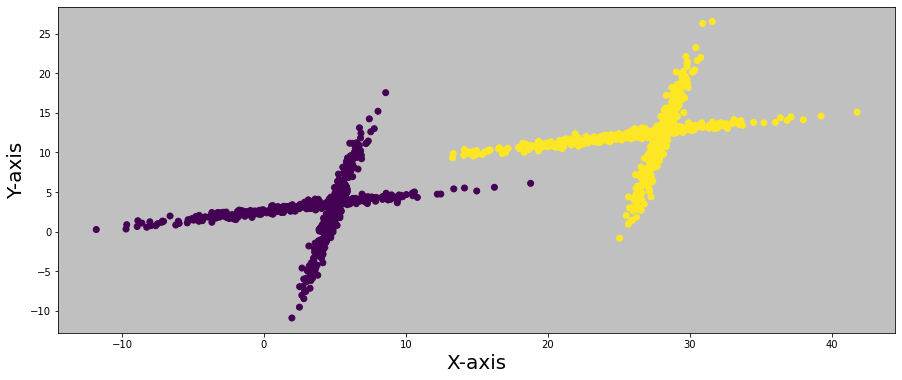

--------------------------------------------------------------------------------------------------------------------------
Test Data Visulization


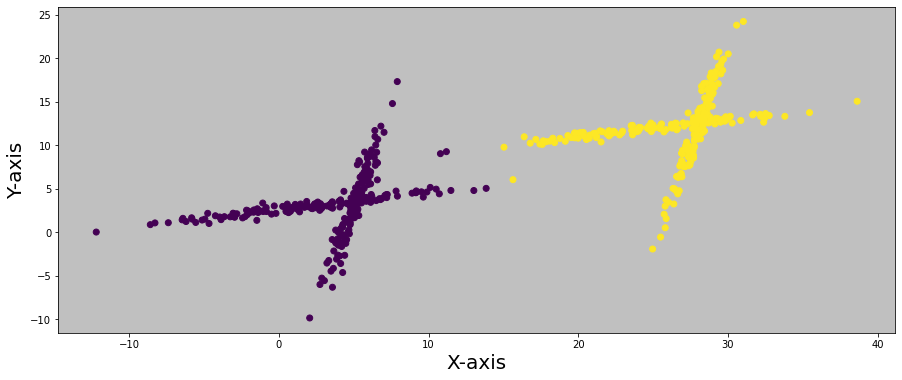

Accuracy of the model on the test data is 0.995


In [27]:

list_X = []
list_Y = []
list_C = []
for i in range(PARAMS2.Nclasses):
    dat = readData(PARAMS2.List_Files[i], PARAMS2.List_Class[i])
    list_X = list_X + dat[0]
    list_Y = list_Y + dat[1]
    list_C = list_C + dat[2]

Data = pd.DataFrame()
Data['X'] = list_X
Data['Y'] = list_Y
Target = list_C
print(Data.head())


# Splitting the Data
X_train, X_test, Y_train, Y_test = train_test_split(Data, Target, test_size=0.3, random_state=42)

Model = BayesClassifier()
Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
#print()

print('\033[1m' + "Training Data Visualization")
Visualize(X_train, Y_train)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' + "Test Data Visulization")
Visualize(X_test, Y_pred)

print(f"Accuracy of the model on the test data is {Accuracy(Y_test, Y_pred)}")